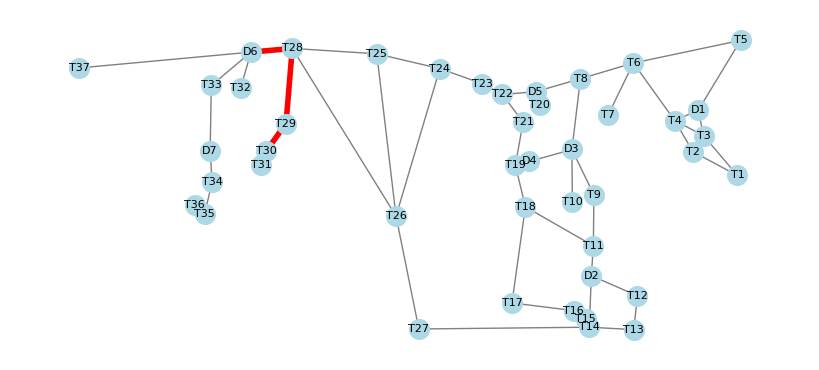

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
import ver2
from tkinter import messagebox
from ver2 import Graph, bfs
from PIL import Image, ImageTk

# Inisialisasi graf
graph = Graph()
graph.create_graph()
bfs = bfs(graph)

# Akses nilai code dan name dari node
codes = graph.get_nodes_codes()
names = graph.get_nodes_names()

def bfs_shortest_path():
    start_node = start_combobox.get()
    
    result = bfs.shortest_path(start_node)
    path = " -> ".join(result[0])
    distance = str(result[1]) + " km"
    nearest_doctor = result[0][-1]

    # Tampilkan hasil pada GUI
    nearest_doctor_label.configure(text=f"Dokter terdekat : {nearest_doctor}", font='normal 10')
    path_label.configure(text=f"Jalur terpendek : {path}", font='normal 10')
    distance_label.configure(text=f"Jarak: {distance}", font='normal 10')

def show_graph_gui():
    
    plt.close()
    
    # Tampilkan graf di frame
    G = graph.G
    pos = {node: (data['longitude'], data['latitude']) for node, data in G.nodes(data=True)}

    # Perbarui warna edge yang dilalui hasil rute terdekat menjadi merah
    shortest_path = bfs.shortest_path(start_combobox.get())[0]
    edge_colors = ['red' if (u, v) in zip(shortest_path, shortest_path[1:]) else 'gray' for u, v, _ in G.edges(data=True)]

    # Tampilkan graf dengan perubahan warna edge
    nx.draw(G, pos=pos, with_labels=True, node_color='lightblue', node_size=200, edge_color=edge_colors, linewidths=1, font_size=8)
    nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)],
                           edge_color='red', width=4)
    fig = plt.gcf()
    fig.set_size_inches(8, 3.5)
    graph_canvas = FigureCanvasTkAgg(fig, master=graphFrame)
    graph_canvas.draw()
    graph_canvas.get_tk_widget().grid(row=2, column=0, sticky="nsew")
    graph_displayed = True
    
def run_function():
    bfs_shortest_path()
    show_graph_gui()
    
def reset_display():
    # Menghapus tampilan hasil rute
    nearest_doctor_label.configure(text="Dokter terdekat: ", font='normal 10')
    path_label.configure(text="Jalur terpendek: ", font='normal 10')
    distance_label.configure(text="Jarak: ", font='normal 10')

    # Menghapus gambar graf
    for widget in graphFrame.winfo_children():
        widget.destroy()
    
#panduan
def show_user_guide():
    guide = """
    Panduan Penggunaan Mencari Rute Dokter Terdekat:
    
    1. Pilih titik awal menu drop-down.
    2. Klik tombol 'Cari rute'.
    3. Hasil pencarian dan graf akan ditampilkan.
    4. Reset tampilan, pilih menu "File" dan klik "Reset"
    
    Catatan: Pastikan memilih node yang valid dan tersedia dalam graf.
    """
    messagebox.showinfo("Panduan Penggunaan", guide)    
    

# Membuat GUI
root = tk.Tk()
root.title("GoingDoc")

# Mengatur style frame
s = ttk.Style()
s.configure("mainFrame.TFrame", background="white")
s.configure("inputFrame.TFrame", background="white")
s.configure("graphFrame.TFrame", background="white")
s.configure("infoFrame.TFrame", background='white')

# Membuat frame
mainFrame = ttk.Frame(root, width=250, height=250, style="mainFrame.TFrame")
mainFrame.grid(row=0, column=0, sticky="NSEW")
root.grid_rowconfigure(0, weight=1)
root.grid_columnconfigure(0, weight=1)

bannerFrame = ttk.Frame(mainFrame, width=250, height=40)
bannerFrame.grid(row=0, column=0, sticky="NEW", columnspan=3)

inputFrame = ttk.Frame(mainFrame, style="inputFrame.TFrame", width=50, height=210)
inputFrame.grid(row=1, column=0,sticky="NSEW")

graphFrame = ttk.Frame(mainFrame, style="graphFrame.TFrame", width=150, height=210)
graphFrame.grid(row=1, column=1,sticky="NSEW")

infoFrame = ttk.Frame(mainFrame, style="infoFrame.TFrame", width=50, height=210)
infoFrame.grid(row=1, column=2, sticky="NSE")

mainFrame.grid_rowconfigure(0, weight=1)
mainFrame.grid_rowconfigure(1, weight=1)
mainFrame.grid_columnconfigure(0, weight=1)
mainFrame.grid_columnconfigure(1, weight=1)


# Mengatur gambar latar belakang
image = Image.open("doctor1.png")  # Ganti dengan path ke gambar yang ingin Anda gunakan
resized_image = image.resize((1360, 260), Image.LANCZOS)
# Konversi gambar ke format yang dapat ditampilkan di Tkinter
background_image = ImageTk.PhotoImage(resized_image)
background_label = tk.Label(bannerFrame, image=background_image, highlightthickness=0)
background_label.grid(padx=0, pady=0,sticky="nsew")


# Membuat Menu Bar
menubar = tk.Menu(root)
root.config(menu=menubar)

# Menu File
file_menu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="File", menu=file_menu)
file_menu.add_command(label="Reset", command=reset_display)

# Menu Help
help_menu = tk.Menu(menubar, tearoff=0)
menubar.add_cascade(label="Help", menu=help_menu)
help_menu.add_command(label="User Guide", command=show_user_guide)

# Membuat label dan combobox untuk memilih node awal dan akhir
start_label = ttk.Label(inputFrame, text="Masukkan titik awal: ")
start_label.configure(background="white", foreground="black", font=("Cambria", 15, "bold"))
start_label.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")

start_combobox = ttk.Combobox(inputFrame, values=codes)
start_combobox.grid(row=1, column=0, padx=5, pady=5, sticky="nsw")


# Membuat tombol untuk mencari rute terpendek
search_button = ttk.Button(inputFrame, text="Cari rute", command=run_function)
search_button.grid(row=2, column=0, padx=5, pady=5, sticky="nsw")

# Membuat label untuk menampilkan hasil
nearest_doctor_label = ttk.Label(inputFrame,background="white", text="Dokter terdekat: ", font='normal 10')
nearest_doctor_label.grid(row=3, column=0, padx=5, pady=5, sticky="nsew")

path_label = ttk.Label(inputFrame, background="white", text="Jalur terpendek: ", font='normal 10')
path_label.grid(row=4, column=0, padx=5, pady=5, sticky="nsew")

distance_label = ttk.Label(inputFrame, background="white", text="Jarak: ", font='normal 10')
distance_label.grid(row=5, column=0, padx=5, pady=5, sticky="nsew")

# Membuat widget untuk menampilkan tabel code dan nama dari nodes dengan kemampuan scrolling
nodes_treeview = ttk.Treeview(infoFrame, height=19, show="headings")
nodes_treeview['columns'] = ('code', 'name')
nodes_treeview.heading('code', text='Code')
nodes_treeview.heading('name', text='Name')
nodes_treeview.column('code', width=100)
nodes_treeview.column('name', width=200)

scrollbar = ttk.Scrollbar(infoFrame, orient='vertical', command=nodes_treeview.yview)
scrollbar.grid(row=0, column=1, sticky="ns")
nodes_treeview.configure(yscrollcommand=scrollbar.set)

# Mengisi tabel code dan nama dari nodes
for code, name in zip(codes, names):
    nodes_treeview.insert('', 'end', values=(code, name))

nodes_treeview.grid(row=0, column=0, pady=10, sticky="nseW")

root.mainloop()